In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization,Conv2D,MaxPool2D,MaxPooling2D

In [55]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [56]:
X_test.shape

(10000, 28, 28)

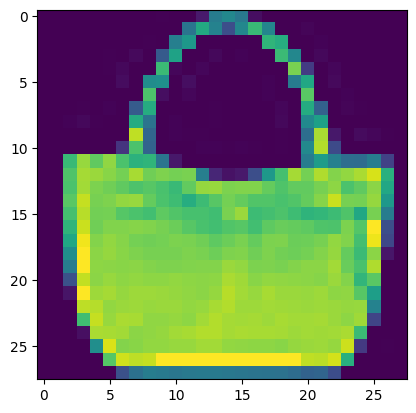

In [57]:
import matplotlib.pyplot as plt
plt.imshow(X_train[100])

In [60]:
from keras.utils import to_categorical
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  # normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0

  # One-hot encoding label
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return X_train, y_train, X_test, y_test

In [61]:
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)

In [63]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Define the LeNet-5 model
def LeNet5(input_shape, num_classes):
    model = Sequential()

    # Layer 1: Convolutional Layer with 6 filters, each of size 5x5
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))

    # Layer 2: Average Pooling Layer with 2x2 pool size
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Layer 3: Convolutional Layer with 16 filters, each of size 5x5
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))

    # Layer 4: Average Pooling Layer with 2x2 pool size
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Flatten the output from previous layer for the fully connected layers
    model.add(Flatten())

    # Layer 5: Fully Connected Layer with 120 units
    model.add(Dense(120, activation='relu'))

    # Layer 6: Fully Connected Layer with 84 units
    model.add(Dense(84, activation='relu'))

    # Output Layer: Fully Connected Layer with num_classes units
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Define input shape and number of classes
input_shape = (28, 28, 1)  # Assuming input images are grayscale 28x28
num_classes = 10  # Number of classes for digit recognition

# Create LeNet-5 model
model = LeNet5(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',loss= tf.keras.losses.categorical_crossentropy, metrics=['accuracy']) #loss='categorical_crossentropy'

# Print model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_12 (Avera  (None, 12, 12, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_13 (Avera  (None, 4, 4, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_7 (Flatten)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 120)              

In [64]:
# model.summary()

In [65]:
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='Adam',
#               metrics=['accuracy'])
#  #String (name of optimizer) or optimizer instance. See tf.keras.optimizers.

In [66]:
X_train.shape,y_train.shape


((60000, 28, 28, 1), (60000, 10))

In [68]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2115 - accuracy: 0.9211 - val_loss: 0.2180 - val_accuracy: 0.9184
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2026 - accuracy: 0.9241 - val_loss: 0.2218 - val_accuracy: 0.9176
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1974 - accuracy: 0.9245 - val_loss: 0.2260 - val_accuracy: 0.9132
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1870 - accuracy: 0.9284 - val_loss: 0.2288 - val_accuracy: 0.9138
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1811 - accuracy: 0.9317 - val_loss: 0.2307 - val_accuracy: 0.9167
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1724 - accuracy: 0.9351 - val_loss: 0.2634 - val_accuracy: 0.9067
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1667 - accuracy: 0.9362 - val_loss: 0.2379 - val_accuracy

In [69]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [70]:
y_pred = y_prob.argmax(axis=1)

In [76]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [77]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test.argmax(axis=1),y_pred)

0.8469

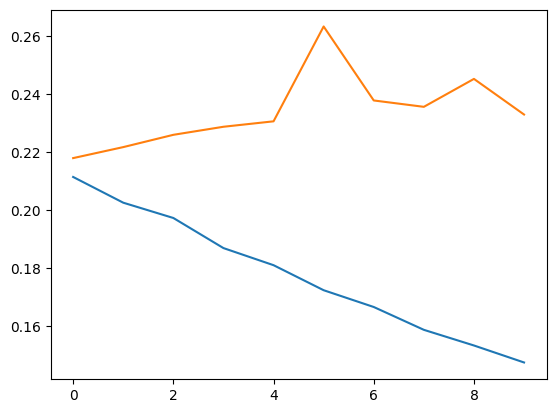

In [79]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

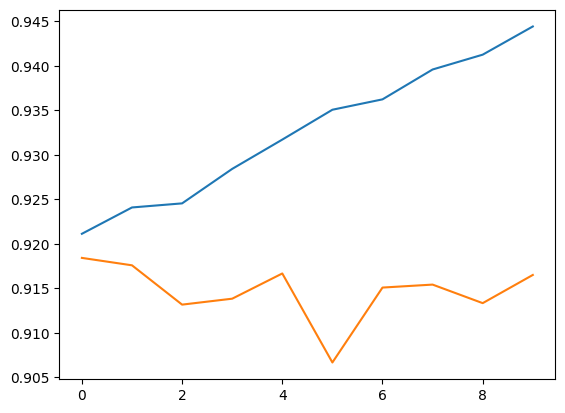

In [80]:
plt.plot(history.history["accuracy"])
plt.label="train_accuracy"
plt.plot(history.history["val_accuracy"],label="test_accuracy")